In [0]:
#!pip install datadotworld
#!pip install datadotworld[pandas]

In [0]:
#!dw configure

In [0]:
from google.colab import drive
import pandas as pd
import numpy as np

import datadotworld as dw

In [0]:
#drive.mount("/content/drive")

In [6]:
cd "drive/My Drive/Colab Notebooks/dw_matrix"

/content/drive/My Drive/Colab Notebooks/dw_matrix


In [0]:
!echo 'data' > .gitignore

In [0]:
!git add .gitignore

In [0]:
data = dw.load_dataset("datafiniti/mens-shoe-prices")

In [15]:
df = data.dataframes['7004_1']
df.shape

/usr/local/lib/python3.6/dist-packages/datadotworld/models/dataset.py:209: UserWarning: Unable to set data frame dtypes automatically using 7004_1 schema. Data types may need to be adjusted manually. Error: Integer column has NA values in column 10
  'Error: {}'.format(resource_name, e))
/usr/local/lib/python3.6/dist-packages/datadotworld/util.py:121: DtypeWarning: Columns (39,45) have mixed types. Specify dtype option on import or set low_memory=False.
  return self._loader_func()


(19387, 48)

In [17]:
df.prices_currency.value_counts()

USD                                                   18524
AUD                                                     338
CAD                                                     303
EUR                                                     107
GBP                                                      22
New with box                                              3
UnbeatableSale.com, Inc. - Walmart.com                    3
new                                                       3
PalmBeach Jewelry - Walmart.com                           3
Wholesale Costume and Party Supplies - Walmart.com        2
SHOEBACCA LTD. - Walmart.com                              1
New without tags                                          1
Shoes.com                                                 1
Name: prices_currency, dtype: int64

In [18]:
df_usd = df [ df.prices_currency == 'USD' ].copy()
df_usd.shape

(18524, 48)

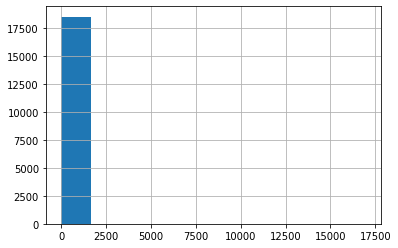

In [19]:
df_usd['prices_amountmin'] = df_usd.prices_amountmin.astype(np.float)
df_usd['prices_amountmin'].hist()

In [25]:
filter_max = np.percentile(df_usd['prices_amountmin'], 99)
filter_max

895.0

In [0]:
df_usd_filter = df_usd[df_usd['prices_amountmin']<filter_max]

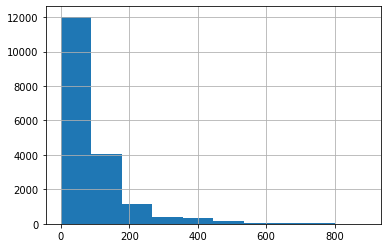

In [27]:
df_usd_filter.prices_amountmin.hist()

In [0]:
df.to_csv('data/shoes_prices.csv', index=False)